# Chapter 5 - Ex2: Glass.data
## Cho dữ liệu glass.data.txt
## Sử dụng thuật toán KNN để dự đoán loại kính dựa trên các thông tin được cung cấp
1. Đọc dữ liệu và gán cho biến data. Tiền xử lý dữ liệu (nếu cần)
2. Tạo inputs data với các cột trừ cột type of class, và outputs data với 1 cột là type of class
3. Từ inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 70-30
4. Thực hiện KNN với X_train, y_train
5. Dự đoán y từ X_test => so sánh với y_test
6. Đánh giá mô hình => Nhận xét
7. Ghi mô hình (nếu mô hình tốt sau khi đánh giá)

## Attribute Information:
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute) 
    + 1 - building_windows_float_processed 
    + 2 - building_windows_non_float_processed 
    + 3 - vehicle_windows_float_processed 
    + 4 - vehicle_windows_non_float_processed (none in this database) 
    + 5 - containers 
    + 6 - tableware 
    + 7 - headlamps

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

## <span style='color:yellow'> 1. Đọc dữ liệu và gán cho biến data. Tiền xử lý dữ liệu (nếu cần)
## <span style='color:yellow'> 2. Tạo inputs data với các cột trừ cột Purchased, và outputs data với 1 cột là Purchased
## <span style='color:yellow'> 3. Từ inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 70-30

In [46]:
glass = pd.read_csv('Data/glass.data.txt', header=None, index_col=0)
glass.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
glass = glass.reset_index(drop=True)
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.0,7


In [49]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [55]:
glass.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [84]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [64]:
glass['Type_of_glass'].value_counts()

#Imbalanced outputs => Use SMOTE to over_sample

Type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [95]:
x = glass.drop('Type_of_glass', axis = 1)
y = glass['Type_of_glass']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## <span style='color:yellow'> 4. Thực hiện KNN với X_train, y_train
## <span style='color:yellow'> 5. Dự đoán y từ X_test => so sánh với y_test
## <span style='color:yellow'> 6. Đánh giá mô hình => Nhận xét
## <span style='color:yellow'> 7. Ghi mô hình (nếu mô hình tốt sau khi đánh giá)

K = 2 ___ Accuracy Test = 0.708 ___ Accuracy gap Test-Train = 0.205
K = 3 ___ Accuracy Test = 0.769 ___ Accuracy gap Test-Train = 0.110
K = 4 ___ Accuracy Test = 0.754 ___ Accuracy gap Test-Train = 0.099
K = 5 ___ Accuracy Test = 0.738 ___ Accuracy gap Test-Train = 0.047
K = 6 ___ Accuracy Test = 0.785 ___ Accuracy gap Test-Train = 0.013
K = 7 ___ Accuracy Test = 0.815 ___ Accuracy gap Test-Train = 0.104
K = 8 ___ Accuracy Test = 0.800 ___ Accuracy gap Test-Train = 0.048
K = 9 ___ Accuracy Test = 0.800 ___ Accuracy gap Test-Train = 0.082
K = 10 ___ Accuracy Test = 0.800 ___ Accuracy gap Test-Train = 0.062
K = 11 ___ Accuracy Test = 0.769 ___ Accuracy gap Test-Train = 0.058
K = 12 ___ Accuracy Test = 0.754 ___ Accuracy gap Test-Train = 0.036
K = 13 ___ Accuracy Test = 0.769 ___ Accuracy gap Test-Train = 0.071
K = 14 ___ Accuracy Test = 0.785 ___ Accuracy gap Test-Train = 0.093
K = 15 ___ Accuracy Test = 0.754 ___ Accuracy gap Test-Train = 0.083
K = 16 ___ Accuracy Test = 0.769 ___ Accur

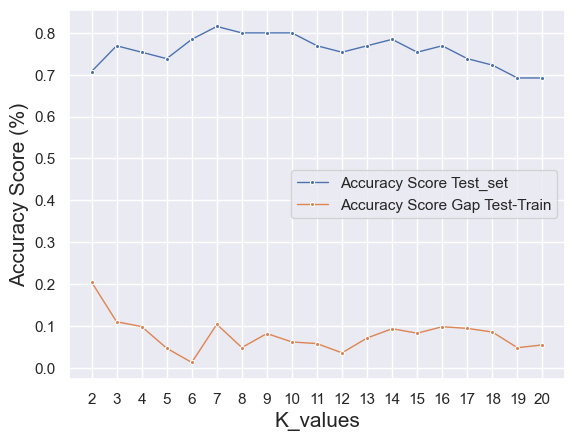


Choose K = 8


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler

lst_k = []
lst_acc_test = []
lst_acc_diff = []

for k in range(2,21):
    lst_k.append(k)
    
    knnC_pipe = Pipeline([
        ("SMOTE_OverSampling", SMOTE(random_state = 1)),
        ("RobustScaller", RobustScaler()),
        ("KNN_Classifier",KNeighborsClassifier(n_neighbors=k))
         ])
    
    knnC_pipe.fit(x_train, y_train)

    y_test_pred =  knnC_pipe.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    lst_acc_test.append(acc_test)

    y_train_pred =  knnC_pipe.predict(x_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    lst_acc_diff.append(np.absolute(acc_test - acc_train))

    print(f'K = {k} ___ Accuracy Test = {acc_test:.3f} ___ Accuracy gap Test-Train = {np.absolute(acc_test - acc_train):.3f}')

print()

sbn.set_theme(style='darkgrid')
sbn.lineplot(x = lst_k, y = lst_acc_test, label = 'Accuracy Score Test_set', marker='.', linewidth = 1)
sbn.lineplot(x = lst_k, y = lst_acc_diff, label = 'Accuracy Score Gap Test-Train', marker='.', linewidth = 1)
plt.xlabel('K_values', size=15)
plt.xticks(lst_k)
plt.ylabel('Accuracy Score (%)', size=15)
plt.show()

print('\nChoose K = 8')

Accuracy score on test set = 0.8


Confusion matrix:
 [[22  1  2  0  0  0]
 [ 3 14  2  1  1  0]
 [ 2  0  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  8]]


Classification report:
               precision    recall  f1-score   support

           1       0.81      0.88      0.85        25
           2       0.88      0.67      0.76        21
           3       0.56      0.71      0.62         7
           5       0.67      1.00      0.80         2
           6       0.50      1.00      0.67         1
           7       1.00      0.89      0.94         9

    accuracy                           0.80        65
   macro avg       0.74      0.86      0.77        65
weighted avg       0.82      0.80      0.80        65


Comments:
# The model is goood
# Accuracy Score on train and test sets ~ 0.75
# F1-score for both classes are acceptable


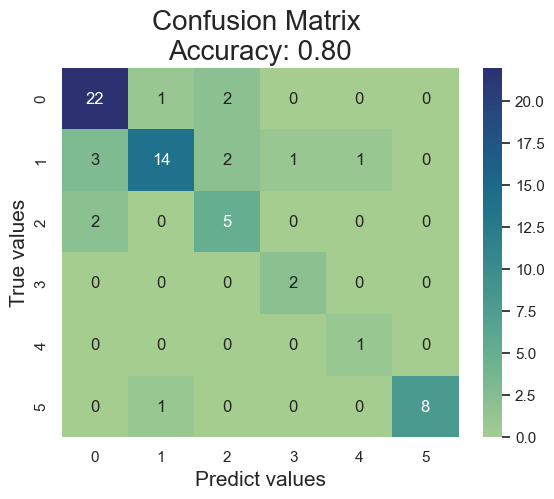

In [80]:
x = glass.drop('Type_of_glass', axis = 1)
y = glass['Type_of_glass']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

knnC_pipe = Pipeline([
        ("SMOTE_OverSampling", SMOTE(random_state = 1)),
        ("RobustScaller", RobustScaler()),
        ("KNN_Classifier",KNeighborsClassifier(n_neighbors=8))
         ])
    
knnC_pipe.fit(x_train, y_train)

y_test_pred =  knnC_pipe.predict(x_test)

print(f'Accuracy score on test set = {accuracy_score(y_test, y_test_pred)}')
print()
print(f'\nConfusion matrix:\n {confusion_matrix(y_test, y_test_pred)}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred)}')


sbn.heatmap(confusion_matrix(y_test, y_test_pred), cmap='crest', annot=True)
plt.xlabel("Predict values", size=15)
plt.ylabel("True values", size=15)
plt.title(f'Confusion Matrix \nAccuracy: {accuracy_score(y_test, y_test_pred):.2f}', size=20)

print('''\nComments:
# The model is goood
# Accuracy Score on train and test sets ~ 0.75
# F1-score for both classes are acceptable''')

## <span style='color:brown'> Use Select_K_best to select the most important features

In [90]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest(score_func = f_classif, k = 'all').fit(x, y)

df_kbest_score = pd.DataFrame({
    'Features': x.columns,
    'Scores': kbest.scores_
})

print(df_kbest_score.sort_values(by='Scores', ascending=False))

print('\nChoose Mg, Ba, Al and Na features to build new KNN model.')

  Features     Scores
2       Mg  65.544521
7       Ba  38.974602
3       Al  35.726676
1       Na  28.548019
5        K   8.748128
6       Ca   2.971426
4       Si   2.787330
8       Fe   2.710882
0       RI   1.608955

Choose Mg, Ba, Al and Na features to build new KNN model.


K = 2 ___ Accuracy Test = 0.631 ___ Accuracy gap Test-Train = 0.262
K = 3 ___ Accuracy Test = 0.508 ___ Accuracy gap Test-Train = 0.231
K = 4 ___ Accuracy Test = 0.585 ___ Accuracy gap Test-Train = 0.140
K = 5 ___ Accuracy Test = 0.585 ___ Accuracy gap Test-Train = 0.134
K = 6 ___ Accuracy Test = 0.646 ___ Accuracy gap Test-Train = 0.052
K = 7 ___ Accuracy Test = 0.554 ___ Accuracy gap Test-Train = 0.151
K = 8 ___ Accuracy Test = 0.569 ___ Accuracy gap Test-Train = 0.082
K = 9 ___ Accuracy Test = 0.554 ___ Accuracy gap Test-Train = 0.077
K = 10 ___ Accuracy Test = 0.538 ___ Accuracy gap Test-Train = 0.106
K = 11 ___ Accuracy Test = 0.554 ___ Accuracy gap Test-Train = 0.084
K = 12 ___ Accuracy Test = 0.554 ___ Accuracy gap Test-Train = 0.070
K = 13 ___ Accuracy Test = 0.554 ___ Accuracy gap Test-Train = 0.064
K = 14 ___ Accuracy Test = 0.585 ___ Accuracy gap Test-Train = 0.033
K = 15 ___ Accuracy Test = 0.600 ___ Accuracy gap Test-Train = 0.009
K = 16 ___ Accuracy Test = 0.554 ___ Accur

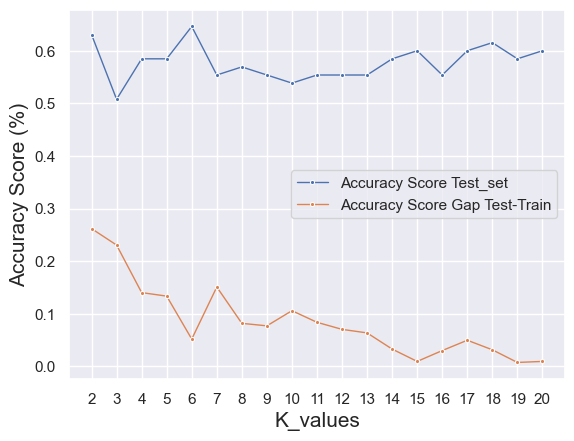

In [92]:
x = glass[['Mg', 'Ba', 'Al', 'Na']]
y = glass['Type_of_glass']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

lst_k = []
lst_acc_test = []
lst_acc_diff = []

for k in range(2,21):
    lst_k.append(k)
    
    knnC_pipe = Pipeline([
        ("SMOTE_OverSampling", SMOTE(random_state = 1)),
        ("RobustScaller", RobustScaler()),
        ("KNN_Classifier",KNeighborsClassifier(n_neighbors=k))
         ])
    
    knnC_pipe.fit(x_train, y_train)

    y_test_pred =  knnC_pipe.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    lst_acc_test.append(acc_test)

    y_train_pred =  knnC_pipe.predict(x_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    lst_acc_diff.append(np.absolute(acc_test - acc_train))

    print(f'K = {k} ___ Accuracy Test = {acc_test:.3f} ___ Accuracy gap Test-Train = {np.absolute(acc_test - acc_train):.3f}')

print()

sbn.set_theme(style='darkgrid')
sbn.lineplot(x = lst_k, y = lst_acc_test, label = 'Accuracy Score Test_set', marker='.', linewidth = 1)
sbn.lineplot(x = lst_k, y = lst_acc_diff, label = 'Accuracy Score Gap Test-Train', marker='.', linewidth = 1)
plt.xlabel('K_values', size=15)
plt.xticks(lst_k)
plt.ylabel('Accuracy Score (%)', size=15)
plt.show()

## Accuracy Scores reduce significantly => Underfitting => Use original model with all features